In [1]:
from functools import partial
from uncertainty_testbed.generators.data_generator_explicit import AnalyticBinaryClassGenerator
from uncertainty_testbed.utilities.functions import map_to_constant
from experiments.experiment_utils import generate_full, hyperparameter_scan, train_from_params, plot_training_curves, \
    get_smoothed_scores_probs_preds, plot_xy, plot_hist, plot_x1y1x2y2, plot_hexbin, plot_decision_data
from experiments.model_templates import SequentialDropout_10_60_025_x3_ScanTemplate

2022-07-10 00:24:16.947795: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-10 00:24:16.947823: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
dimensions = 10
event_name = "cauchy"
threshold = 0.5
noise_name = "cauchy"
noise_level = 0.1
n_all, n_train, n_val = 120096, 33280, 100096

In [3]:
# generate data sets
s = partial(map_to_constant, c=noise_level)
eg = AnalyticBinaryClassGenerator(seed=42, num_inputs=dimensions, name=event_name, threshold=threshold,
                                  noise_distribution=noise_name, noise_scale=s)
data = generate_full(eg, n_all, n_train, n_val)
x_train, y_train, x_val, y_val = data

In [4]:
# In[3]:
template = SequentialDropout_10_60_025_x3_ScanTemplate()  # define model structure and hyperparameter scan schedule
champion_params, scan_results = hyperparameter_scan(template, data)  # perform hyperparameter scan, return winning parameters

Epoch 1/119


2022-07-10 00:24:51.653231: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-10 00:24:51.653258: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-10 00:24:51.653279: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (xps): /proc/driver/nvidia/version does not exist
2022-07-10 00:24:51.654247: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


130/130 [==============================] - 1s 4ms/step - loss: 0.7143 - accuracy: 0.4899 - auc: 0.4926 - val_loss: 0.6977 - val_accuracy: 0.4893 - val_auc: 0.4856
Epoch 2/119
130/130 [==============================] - 0s 2ms/step - loss: 0.7069 - accuracy: 0.4938 - auc: 0.4942 - val_loss: 0.6945 - val_accuracy: 0.5048 - val_auc: 0.5050
Epoch 3/119
130/130 [==============================] - 0s 3ms/step - loss: 0.7016 - accuracy: 0.5011 - auc: 0.5053 - val_loss: 0.6921 - val_accuracy: 0.5250 - val_auc: 0.5273
Epoch 4/119
130/130 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.5089 - auc: 0.5162 - val_loss: 0.6899 - val_accuracy: 0.5414 - val_auc: 0.5512
Epoch 5/119
130/130 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5171 - auc: 0.5286 - val_loss: 0.6876 - val_accuracy: 0.5576 - val_auc: 0.5763
Epoch 6/119
130/130 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5252 - auc: 0.5343 - val_loss: 0.6853 - v

Epoch 48/119
130/130 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7795 - auc: 0.8597 - val_loss: 0.3839 - val_accuracy: 0.8771 - val_auc: 0.9383
Epoch 49/119
130/130 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.7790 - auc: 0.8602 - val_loss: 0.3796 - val_accuracy: 0.8795 - val_auc: 0.9392
Epoch 50/119
130/130 [==============================] - 0s 2ms/step - loss: 0.4699 - accuracy: 0.7826 - auc: 0.8631 - val_loss: 0.3754 - val_accuracy: 0.8814 - val_auc: 0.9400
Epoch 51/119
130/130 [==============================] - 0s 2ms/step - loss: 0.4702 - accuracy: 0.7834 - auc: 0.8634 - val_loss: 0.3719 - val_accuracy: 0.8826 - val_auc: 0.9408
Epoch 52/119
130/130 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.7882 - auc: 0.8678 - val_loss: 0.3684 - val_accuracy: 0.8842 - val_auc: 0.9414
Epoch 53/119
130/130 [==============================] - 0s 2ms/step - loss: 0.4656 - accuracy: 0.7893 - auc: 0.8674 - va

130/130 [==============================] - 0s 2ms/step - loss: 0.5152 - accuracy: 0.7523 - auc: 0.8348 - val_loss: 0.4331 - val_accuracy: 0.8617 - val_auc: 0.9286
Epoch 21/119
130/130 [==============================] - 0s 2ms/step - loss: 0.5071 - accuracy: 0.7570 - auc: 0.8387 - val_loss: 0.4226 - val_accuracy: 0.8660 - val_auc: 0.9309
Epoch 22/119
130/130 [==============================] - 0s 2ms/step - loss: 0.5027 - accuracy: 0.7611 - auc: 0.8422 - val_loss: 0.4134 - val_accuracy: 0.8687 - val_auc: 0.9329
Epoch 23/119
130/130 [==============================] - 0s 2ms/step - loss: 0.4925 - accuracy: 0.7681 - auc: 0.8499 - val_loss: 0.4043 - val_accuracy: 0.8719 - val_auc: 0.9348
Epoch 24/119
130/130 [==============================] - 0s 2ms/step - loss: 0.4868 - accuracy: 0.7714 - auc: 0.8541 - val_loss: 0.3963 - val_accuracy: 0.8755 - val_auc: 0.9364
Epoch 25/119
130/130 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.7760 - auc: 0.8564 - val_loss: 0.389

130/130 [==============================] - 0s 2ms/step - loss: 0.3399 - accuracy: 0.8779 - auc: 0.9341 - val_loss: 0.2762 - val_accuracy: 0.9234 - val_auc: 0.9569
Epoch 113/119
130/130 [==============================] - 0s 2ms/step - loss: 0.3385 - accuracy: 0.8773 - auc: 0.9345 - val_loss: 0.2758 - val_accuracy: 0.9233 - val_auc: 0.9570
Epoch 114/119
130/130 [==============================] - 0s 2ms/step - loss: 0.3355 - accuracy: 0.8791 - auc: 0.9356 - val_loss: 0.2754 - val_accuracy: 0.9233 - val_auc: 0.9571
Epoch 115/119
130/130 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.8762 - auc: 0.9348 - val_loss: 0.2749 - val_accuracy: 0.9240 - val_auc: 0.9571
Epoch 116/119
130/130 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.8769 - auc: 0.9350 - val_loss: 0.2744 - val_accuracy: 0.9240 - val_auc: 0.9572
Epoch 117/119
130/130 [==============================] - 0s 2ms/step - loss: 0.3351 - accuracy: 0.8799 - auc: 0.9358 - val_loss: 

130/130 [==============================] - 0s 3ms/step - loss: 0.3544 - accuracy: 0.8676 - auc: 0.9283 - val_loss: 0.2836 - val_accuracy: 0.9201 - val_auc: 0.9563
Epoch 85/119
130/130 [==============================] - 0s 2ms/step - loss: 0.3500 - accuracy: 0.8683 - auc: 0.9299 - val_loss: 0.2828 - val_accuracy: 0.9203 - val_auc: 0.9564
Epoch 86/119
130/130 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8695 - auc: 0.9297 - val_loss: 0.2823 - val_accuracy: 0.9198 - val_auc: 0.9565
Epoch 87/119
130/130 [==============================] - 0s 2ms/step - loss: 0.3486 - accuracy: 0.8676 - auc: 0.9305 - val_loss: 0.2813 - val_accuracy: 0.9205 - val_auc: 0.9567
Epoch 88/119
130/130 [==============================] - 0s 2ms/step - loss: 0.3449 - accuracy: 0.8715 - auc: 0.9316 - val_loss: 0.2805 - val_accuracy: 0.9215 - val_auc: 0.9568
Epoch 89/119
130/130 [==============================] - 0s 3ms/step - loss: 0.3481 - accuracy: 0.8685 - auc: 0.9305 - val_loss: 0.280

130/130 [==============================] - 0s 2ms/step - loss: 0.5100 - accuracy: 0.7559 - auc: 0.8347 - val_loss: 0.4210 - val_accuracy: 0.8687 - val_auc: 0.9340
Epoch 57/249
130/130 [==============================] - 0s 2ms/step - loss: 0.5058 - accuracy: 0.7585 - auc: 0.8381 - val_loss: 0.4141 - val_accuracy: 0.8724 - val_auc: 0.9358
Epoch 58/249
130/130 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.7587 - auc: 0.8406 - val_loss: 0.4076 - val_accuracy: 0.8755 - val_auc: 0.9374
Epoch 59/249
130/130 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.7666 - auc: 0.8456 - val_loss: 0.4015 - val_accuracy: 0.8789 - val_auc: 0.9387
Epoch 60/249
130/130 [==============================] - 0s 2ms/step - loss: 0.4915 - accuracy: 0.7688 - auc: 0.8494 - val_loss: 0.3955 - val_accuracy: 0.8824 - val_auc: 0.9402
Epoch 61/249
130/130 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.7742 - auc: 0.8540 - val_loss: 0.389

130/130 [==============================] - 0s 2ms/step - loss: 0.3604 - accuracy: 0.8651 - auc: 0.9258 - val_loss: 0.2867 - val_accuracy: 0.9195 - val_auc: 0.9550
Epoch 149/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.8653 - auc: 0.9252 - val_loss: 0.2863 - val_accuracy: 0.9191 - val_auc: 0.9550
Epoch 150/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8659 - auc: 0.9259 - val_loss: 0.2859 - val_accuracy: 0.9194 - val_auc: 0.9551
Epoch 151/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3597 - accuracy: 0.8648 - auc: 0.9253 - val_loss: 0.2856 - val_accuracy: 0.9194 - val_auc: 0.9552
Epoch 152/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3537 - accuracy: 0.8686 - auc: 0.9277 - val_loss: 0.2851 - val_accuracy: 0.9190 - val_auc: 0.9553
Epoch 153/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3560 - accuracy: 0.8657 - auc: 0.9267 - val_loss: 

130/130 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8802 - auc: 0.9393 - val_loss: 0.2632 - val_accuracy: 0.9219 - val_auc: 0.9609
Epoch 241/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3220 - accuracy: 0.8790 - auc: 0.9389 - val_loss: 0.2631 - val_accuracy: 0.9222 - val_auc: 0.9609
Epoch 242/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3226 - accuracy: 0.8791 - auc: 0.9387 - val_loss: 0.2630 - val_accuracy: 0.9226 - val_auc: 0.9609
Epoch 243/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3180 - accuracy: 0.8805 - auc: 0.9403 - val_loss: 0.2627 - val_accuracy: 0.9222 - val_auc: 0.9610
Epoch 244/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.8795 - auc: 0.9402 - val_loss: 0.2625 - val_accuracy: 0.9227 - val_auc: 0.9610
Epoch 245/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.8785 - auc: 0.9402 - val_loss: 

130/130 [==============================] - 0s 3ms/step - loss: 0.3985 - accuracy: 0.8404 - auc: 0.9071 - val_loss: 0.3051 - val_accuracy: 0.9133 - val_auc: 0.9525
Epoch 83/249
130/130 [==============================] - 0s 3ms/step - loss: 0.3971 - accuracy: 0.8413 - auc: 0.9086 - val_loss: 0.3043 - val_accuracy: 0.9140 - val_auc: 0.9526
Epoch 84/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8422 - auc: 0.9089 - val_loss: 0.3035 - val_accuracy: 0.9140 - val_auc: 0.9527
Epoch 85/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8460 - auc: 0.9114 - val_loss: 0.3024 - val_accuracy: 0.9147 - val_auc: 0.9528
Epoch 86/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8465 - auc: 0.9121 - val_loss: 0.3013 - val_accuracy: 0.9151 - val_auc: 0.9529
Epoch 87/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 0.8466 - auc: 0.9119 - val_loss: 0.300

130/130 [==============================] - 0s 2ms/step - loss: 0.3309 - accuracy: 0.8753 - auc: 0.9364 - val_loss: 0.2672 - val_accuracy: 0.9215 - val_auc: 0.9600
Epoch 175/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.8759 - auc: 0.9364 - val_loss: 0.2670 - val_accuracy: 0.9215 - val_auc: 0.9601
Epoch 176/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3312 - accuracy: 0.8753 - auc: 0.9362 - val_loss: 0.2667 - val_accuracy: 0.9219 - val_auc: 0.9601
Epoch 177/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8747 - auc: 0.9371 - val_loss: 0.2664 - val_accuracy: 0.9225 - val_auc: 0.9602
Epoch 178/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3284 - accuracy: 0.8742 - auc: 0.9369 - val_loss: 0.2662 - val_accuracy: 0.9224 - val_auc: 0.9602
Epoch 179/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3226 - accuracy: 0.8777 - auc: 0.9390 - val_loss: 

130/130 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5586 - auc: 0.5813 - val_loss: 0.6724 - val_accuracy: 0.6219 - val_auc: 0.6710
Epoch 17/249
130/130 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5547 - auc: 0.5825 - val_loss: 0.6705 - val_accuracy: 0.6287 - val_auc: 0.6790
Epoch 18/249
130/130 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5609 - auc: 0.5846 - val_loss: 0.6686 - val_accuracy: 0.6328 - val_auc: 0.6867
Epoch 19/249
130/130 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.5670 - auc: 0.5948 - val_loss: 0.6664 - val_accuracy: 0.6373 - val_auc: 0.6947
Epoch 20/249
130/130 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.5721 - auc: 0.6060 - val_loss: 0.6639 - val_accuracy: 0.6435 - val_auc: 0.7028
Epoch 21/249
130/130 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.5737 - auc: 0.6054 - val_loss: 0.661

130/130 [==============================] - 0s 2ms/step - loss: 0.3587 - accuracy: 0.8632 - auc: 0.9256 - val_loss: 0.2814 - val_accuracy: 0.9216 - val_auc: 0.9566
Epoch 109/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3595 - accuracy: 0.8648 - auc: 0.9256 - val_loss: 0.2811 - val_accuracy: 0.9219 - val_auc: 0.9566
Epoch 110/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3551 - accuracy: 0.8646 - auc: 0.9267 - val_loss: 0.2809 - val_accuracy: 0.9224 - val_auc: 0.9568
Epoch 111/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3556 - accuracy: 0.8643 - auc: 0.9265 - val_loss: 0.2805 - val_accuracy: 0.9226 - val_auc: 0.9569
Epoch 112/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3547 - accuracy: 0.8640 - auc: 0.9271 - val_loss: 0.2801 - val_accuracy: 0.9226 - val_auc: 0.9570
Epoch 113/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3557 - accuracy: 0.8674 - auc: 0.9272 - val_loss: 

130/130 [==============================] - 0s 3ms/step - loss: 0.3204 - accuracy: 0.8764 - auc: 0.9397 - val_loss: 0.2639 - val_accuracy: 0.9209 - val_auc: 0.9613
Epoch 201/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3162 - accuracy: 0.8794 - auc: 0.9411 - val_loss: 0.2636 - val_accuracy: 0.9204 - val_auc: 0.9613
Epoch 202/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3208 - accuracy: 0.8752 - auc: 0.9395 - val_loss: 0.2637 - val_accuracy: 0.9208 - val_auc: 0.9614
Epoch 203/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3192 - accuracy: 0.8770 - auc: 0.9399 - val_loss: 0.2638 - val_accuracy: 0.9208 - val_auc: 0.9614
Epoch 204/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.8803 - auc: 0.9406 - val_loss: 0.2636 - val_accuracy: 0.9206 - val_auc: 0.9614
Epoch 205/249
130/130 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.8783 - auc: 0.9398 - val_loss: 

4160/4160 [==============================] - 6s 2ms/step - loss: 0.4271 - accuracy: 0.8675 - auc: 0.9244 - val_loss: 0.3577 - val_accuracy: 0.8972 - val_auc: 0.9478
Epoch 6/6
4160/4160 [==============================] - 6s 2ms/step - loss: 0.4242 - accuracy: 0.8706 - auc: 0.9257 - val_loss: 0.3552 - val_accuracy: 0.8912 - val_auc: 0.9485
{'learning_rate': 0.006, 'batch': 8, 'epoch': 3, 'optimizer': 'rmsprop', 'best_loss': {'loss': 0.3476167619228363, 'epoch': 4}, 'best_auc': {'auc': 0.9484850764274597, 'epoch': 6}, 'best_accuracy': {'accuracy': 0.9007499814033508, 'epoch': 3}}
Epoch 1/6
4160/4160 [==============================] - 7s 2ms/step - loss: 0.3668 - accuracy: 0.8495 - auc: 0.9208 - val_loss: 0.2472 - val_accuracy: 0.9164 - val_auc: 0.9597
Epoch 2/6
4160/4160 [==============================] - 7s 2ms/step - loss: 0.2873 - accuracy: 0.8935 - auc: 0.9486 - val_loss: 0.2444 - val_accuracy: 0.9132 - val_auc: 0.9613
Epoch 3/6
4160/4160 [==============================] - 7s 2ms/step

Epoch 12/18
4160/4160 [==============================] - 7s 2ms/step - loss: 0.2813 - accuracy: 0.9033 - auc: 0.9523 - val_loss: 0.2503 - val_accuracy: 0.9171 - val_auc: 0.9628
Epoch 13/18
4160/4160 [==============================] - 7s 2ms/step - loss: 0.2807 - accuracy: 0.9041 - auc: 0.9528 - val_loss: 0.2446 - val_accuracy: 0.9201 - val_auc: 0.9670
Epoch 14/18
4160/4160 [==============================] - 7s 2ms/step - loss: 0.2846 - accuracy: 0.9041 - auc: 0.9518 - val_loss: 0.2461 - val_accuracy: 0.9147 - val_auc: 0.9629
Epoch 15/18
4160/4160 [==============================] - 7s 2ms/step - loss: 0.2796 - accuracy: 0.9045 - auc: 0.9525 - val_loss: 0.2304 - val_accuracy: 0.9190 - val_auc: 0.9656
Epoch 16/18
4160/4160 [==============================] - 7s 2ms/step - loss: 0.2782 - accuracy: 0.9056 - auc: 0.9530 - val_loss: 0.2419 - val_accuracy: 0.9144 - val_auc: 0.9618
Epoch 17/18
4160/4160 [==============================] - 7s 2ms/step - loss: 0.2809 - accuracy: 0.9030 - auc: 0.952

In [5]:
model, history = train_from_params(champion_params, template, data)

Epoch 1/3
4160/4160 [==============================] - 7s 2ms/step - loss: 0.3785 - accuracy: 0.8412 - auc: 0.9159 - val_loss: 0.2689 - val_accuracy: 0.9097 - val_auc: 0.9597
Epoch 2/3
4160/4160 [==============================] - 6s 2ms/step - loss: 0.2940 - accuracy: 0.8887 - auc: 0.9461 - val_loss: 0.2403 - val_accuracy: 0.9139 - val_auc: 0.9629
Epoch 3/3
4160/4160 [==============================] - 6s 1ms/step - loss: 0.2769 - accuracy: 0.8958 - auc: 0.9518 - val_loss: 0.2311 - val_accuracy: 0.9194 - val_auc: 0.9649


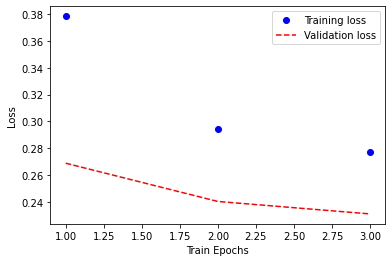

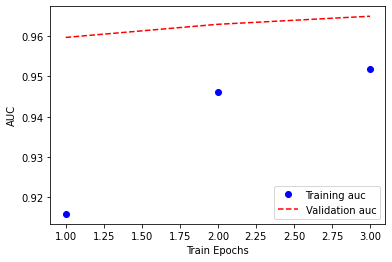

In [6]:
plot_training_curves(history)  # plot loss and auc train metrics from history object.

In [7]:
scores, probs, p = get_smoothed_scores_probs_preds(model, eg, x_val[:1000, :], 5)

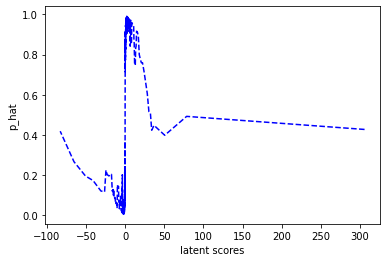

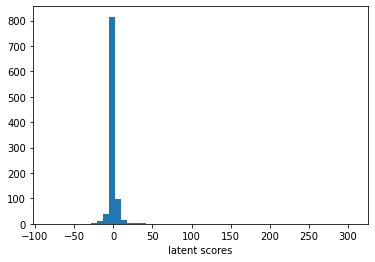

In [8]:
plot_xys(scores, ((p, '--b'),), 'latent scores', 'p_hat')
plot_hist(scores, 50, 'latent scores')

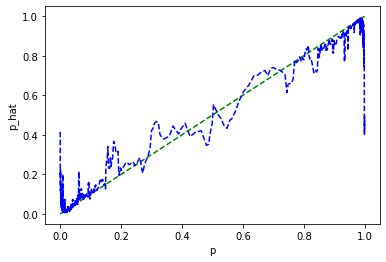

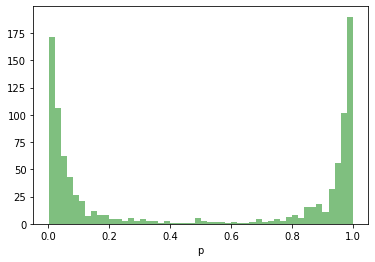

In [9]:
plot_xys(probs, ((probs, '--g'), (p, '--b')), 'p', 'p_hat')
plot_hist(x=probs, bins=50, xlabel='p', color='g', alpha=0.5)

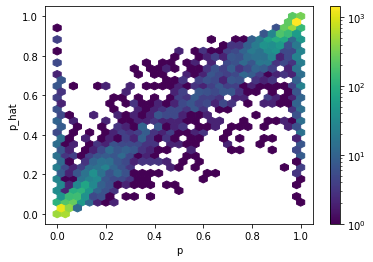

In [10]:
scores, probs, p = get_smoothed_scores_probs_preds(model, eg, x_val[:10000, :], 1)
plot_hexbin(x=probs, y=p, xlabel='p', ylabel='p_hat', gridsize=30, bins='log')

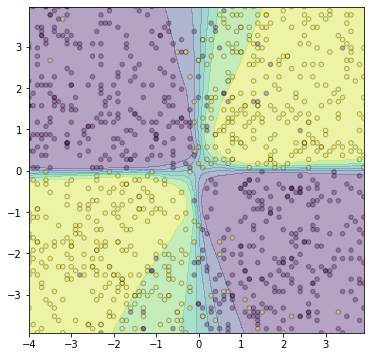

In [11]:
plot_decision_data(data, slice_i=2, slice_j=6, model=model, eg=eg, figsize=(6,6), alpha_scatter=0.3)

In [12]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 60)                660       
                                                                 
 dropout_72 (Dropout)        (None, 60)                0         
                                                                 
 dense_97 (Dense)            (None, 60)                3660      
                                                                 
 dropout_73 (Dropout)        (None, 60)                0         
                                                                 
 dense_98 (Dense)            (None, 60)                3660      
                                                                 
 dropout_74 (Dropout)        (None, 60)                0         
                                                                 
 dense_99 (Dense)            (None, 1)               

In [14]:
champion_params

{'learning_rate': 0.0084,
 'batch': 8,
 'epoch': 3,
 'optimizer': 'adamax',
 'best_loss': {'loss': 0.21445024013519287, 'epoch': 3},
 'best_auc': {'auc': 0.9689970016479492, 'epoch': 4},
 'best_accuracy': {'accuracy': 0.9278500080108643, 'epoch': 3},
 'model': <keras.engine.sequential.Sequential at 0x7fc7204728b0>}

In [15]:
scan_results

[{'learning_rate': 2.4e-05,
  'batch': 256,
  'epoch': 84,
  'optimizer': 'nadam',
  'best_loss': {'loss': 0.2937218248844147, 'epoch': 119},
  'best_auc': {'auc': 0.9540536999702454, 'epoch': 119},
  'best_accuracy': {'accuracy': 0.9179999828338623, 'epoch': 117}},
 {'learning_rate': 3e-05,
  'batch': 256,
  'epoch': 84,
  'optimizer': 'nadam',
  'best_loss': {'loss': 0.273013710975647, 'epoch': 119},
  'best_auc': {'auc': 0.9574644565582275, 'epoch': 119},
  'best_accuracy': {'accuracy': 0.9251499772071838, 'epoch': 118}},
 {'learning_rate': 3.6e-05,
  'batch': 256,
  'epoch': 84,
  'optimizer': 'nadam',
  'best_loss': {'loss': 0.26156410574913025, 'epoch': 119},
  'best_auc': {'auc': 0.960878849029541, 'epoch': 119},
  'best_accuracy': {'accuracy': 0.9261999726295471, 'epoch': 114}},
 {'learning_rate': 0.004,
  'batch': 256,
  'epoch': 177,
  'optimizer': 'sgd',
  'best_loss': {'loss': 0.2618270814418793, 'epoch': 248},
  'best_auc': {'auc': 0.9611871838569641, 'epoch': 248},
  'bes